# Scraping the count per century

In [1]:
import pandas as pd
from urllib import request
from bs4 import BeautifulSoup as bs

In [13]:
# Defining the range of each century
centuries = []
year = -799
for i in range(1,17):
    century = [year]
    year = year + 99
    century.append(year)
    centuries.append(century)
    year = year + 1

In [71]:
# opening an empty container to store the data
data = {}

# iterating through the centuries
for pair in centuries:
    max_date = pair[1]
    min_date = pair[0]

    # Century range
    max_date = pair[1]
    min_date = pair[0]

    print(str(min_date) + ' - ' + str(max_date))

    # Century label

    if min_date < 0:
        temp = 'BCE'
        cent = str(min_date - 1)[1:2] + ' century '+ temp

    else:
        temp = 'CE'
        cent = str(max_date)[:1] + ' century '+ temp

    print(f'Century: {cent}')

    # Defining the base URL, taken from the query "material + papyrus"
    baseurl = f"https://www.trismegistos.org/tm/detail_list2.php?max_date={max_date}&transfer_results=papyrus%40108%40Material%40papyrus%40100%40%40top%7CPapyrus%40Papyrus.+%C3%86gyptologisk+tidsskrift%40publ%40Papyrus.+%C3%86gyptologisk+tidsskrift%400%40%40bottom%7C%7C%7C%7C&min_date={min_date}&language=&publ_date=&search_criteria_or=&material=&order_records=Century"
    page = request.urlopen(baseurl).read() # first, we open the page and read it
    pagesoup = bs(page, features='html.parser') # then, we parse it

    # Finding the location of the text count and extracting it
    numoftexts= pagesoup.find('h4',attrs={'id':'numberOfResults'}).text.split(' texts ')[0]
    numoftexts = int(numoftexts.replace('\t','').replace('\n','').replace('\r',''))
    print(f'Count:{numoftexts}')
    # storing the count along with the century label in the empy container
    data[cent] = int(numoftexts)
    print('next...')

-799 - -700
Century: 8 century BCE
Count:15
next...
-699 - -600
Century: 7 century BCE
Count:126
next...
-599 - -500
Century: 6 century BCE
Count:217
next...
-499 - -400
Century: 5 century BCE
Count:447
next...
-399 - -300
Century: 4 century BCE
Count:342
next...
-299 - -200
Century: 3 century BCE
Count:5411
next...
-199 - -100
Century: 2 century BCE
Count:5412
next...
-99 - 0
Century: 1 century BCE
Count:2188
next...
1 - 100
Century: 1 century CE
Count:9243
next...
101 - 200
Century: 2 century CE
Count:14977
next...
201 - 300
Century: 3 century CE
Count:9978
next...
301 - 400
Century: 4 century CE
Count:5520
next...
401 - 500
Century: 5 century CE
Count:4122
next...
501 - 600
Century: 6 century CE
Count:5578
next...
601 - 700
Century: 7 century CE
Count:4978
next...
701 - 800
Century: 8 century CE
Count:4662
next...


In [2]:
df = pd.read_csv('papcountpercent.csv')

In [91]:
# Saving the data into a DataFrame
df = pd.DataFrame.from_dict(data=data, orient='index')
df['Century'] = df.index
df.reset_index(drop=True, inplace=True)
df = df.rename(columns={0:'Count'})
df

,Count,Century
0,15,8 century BCE
1,126,7 century BCE
2,217,6 century BCE
3,447,5 century BCE
4,342,4 century BCE
5,5411,3 century BCE
6,5412,2 century BCE
7,2188,1 century BCE
8,9243,1 century CE
9,14977,2 century CE


In [92]:
# Saving the range as a column
df_range = [str(i[0]) + ' - ' + str(i[1]) for i in centuries]
df['Range'] = df_range

In [183]:
# Saving the DataFrame
df.to_csv('papcountpercent.csv',index=False)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

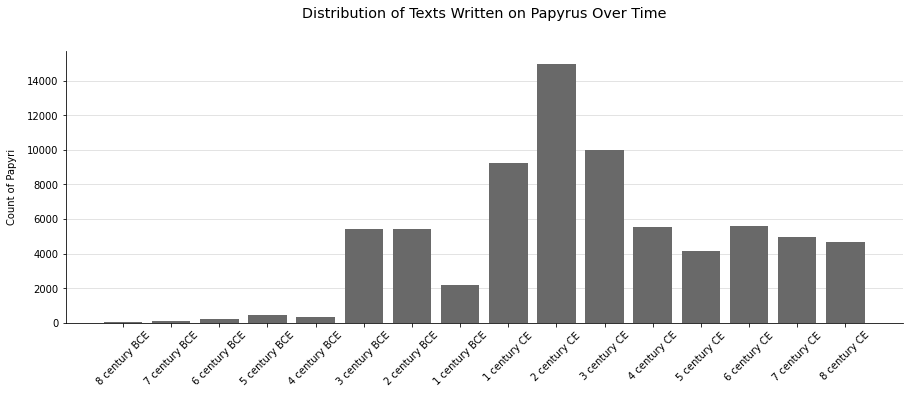

In [10]:
# multiple line plots
plt.figure(figsize=(15,5))
plt.grid(visible=True,which='major',axis='y',color='gainsboro',zorder=0)
plt.bar('Century', 'Count', data=df, color='dimgray', linewidth=3,zorder=3)
# show legend

plt.ylabel('Count of Papyri',labelpad=10)
plt.title('Distribution of Texts Written on Papyrus Over Time', x=0.5, y=1.1, fontsize='x-large')

sns.despine()
plt.xticks(rotation=45)
# show graph
#plt.show()
plt.savefig("papyruscount.png",dpi=300, bbox_inches="tight")

# Scraping the count per year

In [2]:
import time

In [16]:
# opening an empty container to store the data
#data = {}

count = 0
# iterating through the years
for i in range(419,799):
    count = count + 1
    max_date = i
    min_date = i

    print(i)
    # Defining the base URL, taken from the query "material + papyrus"
    baseurl = f"https://www.trismegistos.org/tm/detail_list2.php?max_date={max_date}&transfer_results=papyrus%40108%40Material%40papyrus%40100%40%40top%7CPapyrus%40Papyrus.+%C3%86gyptologisk+tidsskrift%40publ%40Papyrus.+%C3%86gyptologisk+tidsskrift%400%40%40bottom%7C%7C%7C%7C&min_date={min_date}&language=&publ_date=&search_criteria_or=&material=&order_records=Century"
    page = request.urlopen(baseurl).read() # first, we open the page and read it
    pagesoup = bs(page, features='html.parser') # then, we parse it
    numoftexts= pagesoup.find('h4',attrs={'id':'numberOfResults'}).text.split(' texts ')[0]
    numoftexts = int(numoftexts.replace('\t','').replace('\n','').replace('\r',''))
    print(f'Count:{numoftexts}')
    # storing the data in the container
    data[i] = int(numoftexts)
    print('next...')
    # Setting a waiting time for every 100 years scraped to avoid getting kicked out by the server
    if count % 50 == 0:
        time.sleep(3)

419
Count:7
next...
420
Count:7
next...
421
Count:6
next...
422
Count:2
next...
423
Count:6
next...
424
Count:3
next...
425
Count:2
next...
426
Count:8
next...
427
Count:4
next...
428
Count:2
next...
429
Count:4
next...
430
Count:12
next...
431
Count:5
next...
432
Count:5
next...
433
Count:3
next...
434
Count:4
next...
435
Count:6
next...
436
Count:5
next...
437
Count:6
next...
438
Count:1
next...
439
Count:8
next...
440
Count:3
next...
441
Count:2
next...
442
Count:7
next...
443
Count:4
next...
444
Count:7
next...
445
Count:2
next...
446
Count:4
next...
447
Count:3
next...
448
Count:2
next...
449
Count:6
next...
450
Count:9
next...
451
Count:6
next...
452
Count:2
next...
453
Count:4
next...
454
Count:6
next...
455
Count:5
next...
456
Count:3
next...
457
Count:3
next...
458
Count:2
next...
459
Count:2
next...
460
Count:2
next...
461
Count:1
next...
462
Count:2
next...
463
Count:3
next...
464
Count:4
next...
465
Count:7
next...
466
Count:8
next...
467
Count:3
next...
468
Count:4
next...

In [17]:
# Saving the data into a DataFrame
df1 = pd.DataFrame.from_dict(data=data, orient='index')
df1['Year'] = df1.index
df1.reset_index(drop=True, inplace=True)
df1 = df1.rename(columns={0:'Count'})
df1

,Count,Year
0,0,-799
1,0,-798
2,0,-797
3,0,-796
4,0,-795
...,...,...
1593,2,794
1594,2,795
1595,4,796
1596,1,797


In [19]:
df1.to_csv('papcountperyear.csv',index=False)

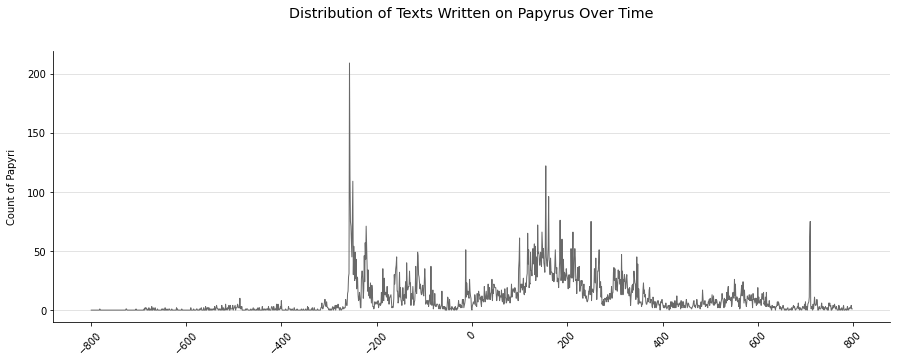

<Figure size 432x288 with 0 Axes>

In [24]:
# multiple line plots
plt.figure(figsize=(15,5))

plt.plot('Year', 'Count', data=df1, color='dimgray', linewidth=1)
plt.grid(visible=True,which='major',axis='y',color='gainsboro')

# show legend

plt.ylabel('Count of Papyri',labelpad=10)
plt.title('Distribution of Texts Written on Papyrus Over Time', x=0.5, y=1.1, fontsize='x-large')

sns.despine()
plt.xticks(rotation=45)
# show graph
plt.show()
plt.savefig("papyruscountperyear.png",dpi=300, bbox_inches="tight")

# Scraping the Zenon Archive count

In [25]:
# opening an empty container to store the data
data = {}

count = 0
# iterating through the years
for i in range(-280,-210):
    count = count + 1
    max_date = i
    min_date = i

    print(i)
    # Defining the base URL, taken from the query "material + papyrus"
    baseurl = f"https://www.trismegistos.org/tm/detail_list2.php?max_date={max_date}&transfer_results=Zenon+archive%40256%40Arch%40archive+of+Zenon+son+of+Agreophon%401840%40%40top%7C%7C&min_date={min_date}&language=&publ_date=&search_criteria_or=&material=&order_records=Century"
    page = request.urlopen(baseurl).read() # first, we open the page and read it
    pagesoup = bs(page, features='html.parser') # then, we parse it
    numoftexts= pagesoup.find('h4',attrs={'id':'numberOfResults'}).text.split(' texts ')[0]
    numoftexts = int(numoftexts.replace('\t','').replace('\n','').replace('\r',''))
    print(f'Count:{numoftexts}')
    # storing the data in the container
    data[i] = int(numoftexts)
    print('next...')
    # Setting a waiting time for every 100 years scraped to avoid getting kicked out by the server
    if count % 50 == 0:
        time.sleep(3)

-280
Count:0
next...
-279
Count:0
next...
-278
Count:0
next...
-277
Count:0
next...
-276
Count:0
next...
-275
Count:0
next...
-274
Count:0
next...
-273
Count:0
next...
-272
Count:0
next...
-271
Count:0
next...
-270
Count:0
next...
-269
Count:0
next...
-268
Count:0
next...
-267
Count:0
next...
-266
Count:0
next...
-265
Count:1
next...
-264
Count:0
next...
-263
Count:1
next...
-262
Count:0
next...
-261
Count:5
next...
-260
Count:3
next...
-259
Count:18
next...
-258
Count:30
next...
-257
Count:195
next...
-256
Count:88
next...
-255
Count:60
next...
-254
Count:65
next...
-253
Count:50
next...
-252
Count:38
next...
-251
Count:54
next...
-250
Count:71
next...
-249
Count:20
next...
-248
Count:34
next...
-247
Count:14
next...
-246
Count:13
next...
-245
Count:13
next...
-244
Count:14
next...
-243
Count:20
next...
-242
Count:12
next...
-241
Count:11
next...
-240
Count:3
next...
-239
Count:2
next...
-238
Count:0
next...
-237
Count:1
next...
-236
Count:2
next...
-235
Count:1
next...
-234
Count:0
n

In [26]:
# Saving the data into a DataFrame
df2 = pd.DataFrame.from_dict(data=data, orient='index')
df2['Year'] = df2.index
df2.reset_index(drop=True, inplace=True)
df2 = df2.rename(columns={0:'Count'})
df2

,Count,Year
0,0,-280
1,0,-279
2,0,-278
3,0,-277
4,0,-276
...,...,...
65,0,-215
66,0,-214
67,0,-213
68,0,-212


In [28]:
df3= df1.merge(df2, on='Year', how='outer')
df3.fillna(0)

,Count_x,Year,Count_y
0,0,-799,0.0
1,0,-798,0.0
2,0,-797,0.0
3,0,-796,0.0
4,0,-795,0.0
...,...,...,...
1593,2,794,0.0
1594,2,795,0.0
1595,4,796,0.0
1596,1,797,0.0


In [33]:
df3.to_csv('comparison.csv',index=False)

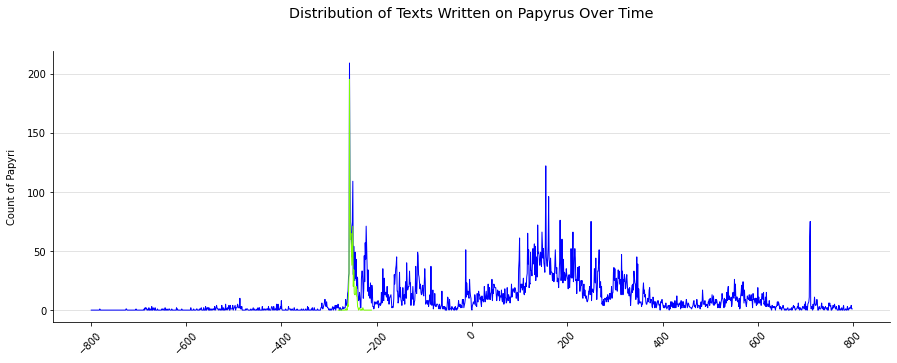

<Figure size 432x288 with 0 Axes>

In [32]:
# multiple line plots
plt.figure(figsize=(15,5))

plt.plot('Year', 'Count_x', data=df3, color='blue', linewidth=1)
plt.plot('Year', 'Count_y', data=df3, color='lawngreen', linewidth=1)
plt.grid(visible=True,which='major',axis='y',color='gainsboro')

# show legend

plt.ylabel('Count of Papyri',labelpad=10)
plt.title('Distribution of Texts Written on Papyrus Over Time', x=0.5, y=1.1, fontsize='x-large')

sns.despine()
plt.xticks(rotation=45)
# show graph
plt.show()
plt.savefig("papyruscountperyear.png",dpi=300, bbox_inches="tight")

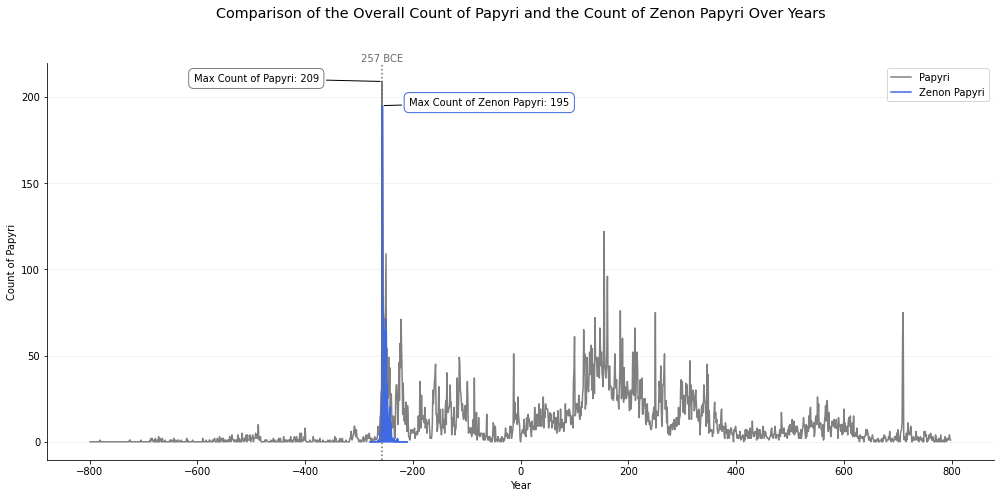

In [12]:
df = pd.read_csv('comparison.csv')
# Set up the plot with further modifications
plt.figure(figsize=(14, 7))

# Plotting Count_x in gray
plt.plot(df['Year'], df['Count_x'], label='Papyri', color='grey', linestyle='-')

# Plotting Count_y in blue and shading the area under it with the same blue color
plt.plot(df['Year'], df['Count_y'], label='Zenon Papyri', color='royalblue', linestyle='-')
plt.fill_between(df['Year'], df['Count_y'], color='royalblue')#, alpha=0.5)  # Using alpha for a slightly transparent effect

# Adding annotations pointing to the highest peaks for each count

# Annotation for the highest peak of Count_x
peak_year_x = df['Year'][df['Count_x'].idxmax()]
peak_value_x = df['Count_x'].max()
plt.annotate(f'Max Count of Papyri: {peak_value_x}',
             xy=(peak_year_x, peak_value_x),
             xytext=(peak_year_x-350, peak_value_x ),  # Position of the text
             arrowprops=dict(facecolor='grey', arrowstyle='-'),
             bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round,pad=0.5'))

# Annotation for the highest peak of Count_y (ignoring NaN values)
peak_year_y = df['Year'][df['Count_y'].idxmax()]
peak_value_y = df['Count_y'].max()
plt.annotate(f'Max Count of Zenon Papyri: {int(peak_value_y)}',
             xy=(peak_year_y, peak_value_y),
             xytext=(peak_year_y+50, peak_value_y),  # Position of the text
             arrowprops=dict(facecolor='royalblue', arrowstyle='-'),
             bbox=dict(facecolor='white', edgecolor='royalblue', boxstyle='round,pad=0.5'))
# Adding vertical dotted line at the year of the peak (since both counts share the same peak year)
plt.axvline(x=peak_year_x, color='dimgray', linestyle=':')

# Display the peak year at the top of the graph
plt.text(peak_year_x, 1.05 * max(df['Count_x'].max(), df['Count_y'].max()),
         f'{-1*peak_year_x} BCE', ha='center', va='bottom', color='dimgray')


# Adding title and labels
plt.title('Comparison of the Overall Count of Papyri and the Count of Zenon Papyri Over Years',x=0.5, y=1.1, fontsize='x-large')
plt.xlabel('Year')
plt.ylabel('Count of Papyri')
plt.legend()

plt.grid(True, which='major', axis='y',linestyle='--', linewidth=0.5, color='gainsboro')
sns.despine()
# Display the plot
plt.tight_layout()
#plt.show()
plt.savefig("papyruscountcomparison.png",dpi=300, bbox_inches="tight")

In [4]:
import pickle

In [8]:

with open('saved_dictionary2.pkl', 'wb') as f:
    pickle.dump(data, f)

# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

In [5]:
with open('saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [9]:
data = loaded_dict

In [13]:
data[-1]

1

In [14]:
list(data)[-1]

418

In [15]:
data[418]

3